In [451]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import cryptocompy
from cryptocompy.cryptocompy import coin, price
from datetime import datetime as Date
# https://github.com/agalea91/cryptocompare-api/blob/master/CryptoCompare.API.2017.08.ipynb

In [298]:
# Pretty print the JSON
import uuid
from IPython.display import display_javascript, display_html, display
import json

class RenderJSON(object):
    def __init__(self, json_data):
        if isinstance(json_data, dict):
            self.json_str = json.dumps(json_data)
        else:
            self.json_str = json_data
        self.uuid = str(uuid.uuid4())

    def _ipython_display_(self):
        display_html('<div id="{}" style="height: 600px; width:100%;"></div>'.format(self.uuid), raw=True)
        display_javascript("""
        require(["https://rawgit.com/caldwell/renderjson/master/renderjson.js"], function() {
        document.getElementById('%s').appendChild(renderjson(%s))
        });
        """ % (self.uuid, self.json_str), raw=True)

In [437]:
priceCurrent("ADA", comparison_symbols = ["BTC"], exchange='Binance')
priceCurrent("BTC", comparison_symbols = ["USD"], exchange='Bitstamp')
#coin.get_coin_list(coins=["ADA", "ETH"])
coin_data = coin.get_coin_snapshot("ADA", "BTC")

{'BTC': 3.468e-05}

{'USD': 14428.02}

In [438]:
#hourly_price_historical("ADA", 'BTC', 9999, time_delta, "Binance")

In [95]:
time_delta = 1 # Bar width in hours
df = hourly_price_historical('ADA', 'BTC', 9999, time_delta, "Binance")
df.tail(10)
time_delta = 20 # Bar width in minutes
dfm = minute_price_historical('BTC', 'USD', 9999, time_delta, "Bitstamp")
time_delta = 1 # Bar width in hours
dfh = hourly_price_historical('BTC', 'USD', 9999, time_delta, "Bitstamp")
dfm.tail(10)
dfh = hourly_price_historical("GNO", 'BTC', 9999, time_delta, "Poloniex")
hourly_price_historical("ADA", 'BTC', 9999, time_delta, exchange)
[(x["MARKET"], x["PRICE"])  for x in coin.get_coin_snapshot("ADA", "BTC")["Exchanges"]]

In [259]:
def filter_transactions(transactions, by_date = None, by_coins = None):
    transactions = list(transactions)
    
    if by_date != None:
        transactions = transactions
        
    if by_coins != None:
        transactions = transactions
        
    return transactions

def sort_transactions(transactions, asc = False):
    return transactions

def process_transactions(transactions):
    
    exchanges = {}
    coins = {}
    cash = {}

    for txn in transactions:
        if txn.exchange not in exchanges.keys():
            exchanges[txn.exchange] = {}
            exchanges[txn.exchange]["Coins"] = {}
            exchanges[txn.exchange]["Cash"] = {}
            
        asset = txn.asset
        amount = txn.amount
        direction = txn.direction
        
        if isinstance(asset, Cash):
            if asset.name not in exchanges[txn.exchange]["Cash"].keys():
                exchanges[txn.exchange]["Cash"][asset.name] = 0.0

            if direction == "BUY":
                exchanges[txn.exchange]["Cash"][asset.name] += amount
            else:
                exchanges[txn.exchange]["Cash"][asset.name] -= amount

        if isinstance(asset, Coin):
            if asset.name not in exchanges[txn.exchange]["Coins"].keys():
                exchanges[txn.exchange]["Coins"][asset.name] = 0.0

            if direction == "BUY":
                exchanges[txn.exchange]["Coins"][asset.name] += amount
            else:
                exchanges[txn.exchange]["Coins"][asset.name] -= amount

    return exchanges

        
class Coin:
    def __init__(self, name):
        self.name = name
        
class Cash:
    def __init__(self, name):
        self.name = name
        
    
class Book:
    def __init__(self, name):
        self.name = name
        self.transactions = []
        
    def buy(self, amount, asset, datetime, exchange):
        self.transactions.append(Transaction("BUY", amount, asset, datetime, exchange))
        
    def sell(self, amount, asset, datetime, exchange):
        self.transactions.append(Transaction("SELL", amount, asset, datetime, exchange))
        
    def positions(self, as_of_date = None, include_cash = False, filter_coins = None):
        transactions = list(self.transactions)
        transactions = sort_transactions(transactions)
        
        transactions = filter_transactions(transactions, as_of_date)
        transactions = filter_transactions(transactions, filter_coins)
        
        exchanges_holdings  = process_transactions(transactions)
        
        positions = []
        for exch, holdings in exchanges_holdings.items():
            for coin, amount in holdings["Coins"].items():
                positions.append({"Coin" : coin, "Amount": amount, "Exchange": exch})
        
        return pd.DataFrame(positions, 
                            columns = ["Amount", "Exchange"], 
                            index=[pos["Coin"] for pos in positions])
    
    
            
class Transaction:
    def __init__(self, direction, amount, asset, datetime, exchange):
        self.direction = direction
        self.asset = asset
        self.amount = amount
        self.exchange = exchange
        self.datetime = datetime


In [441]:
book = Book("Holding book")

book.buy(0.01586039, Coin("BTC"), Date(2017, 10, 18, 20, 10, 55), "Bitstamp")
book.buy(82.34, Coin("XRP"), Date(2017, 10, 18, 20, 10, 55), "Bitstamp")
book.buy(0.65359775, Coin("GNO"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(0.15679700, Coin("ETH"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(0.30695223, Coin("XMR"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(0.19581595, Coin("ZEC"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(0.0843199, Coin("DASH"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(158.84, Coin("REQ"), Date(2017, 10, 18, 20, 10, 55), "Binance")
book.buy(13.99, Coin("IOT"), Date(2017, 10, 18, 20, 10, 55), "Binance")
book.buy(1471.66, Coin("SC"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(63.94, Coin("ADA"), Date(2017, 10, 18, 20, 10, 55), "Binance")
book.buy(0.56943, Cash("QTUM"), Date(2017, 10, 18, 20, 10, 55), "Binance")
book.buy(1.78, Cash("OMG"), Date(2017, 10, 18, 20, 10, 55), "Poloniex")
book.buy(2, Cash("EOS"), Date(2017, 10, 18, 20, 10, 55), "Binance")

portfolio = book.positions()






In [442]:


for row in portfolio.iterrows():
    (idx, content) = row
    print (idx, content["Amount"], content["Exchange"])

XMR 0.30695223 Poloniex
GNO 0.65359775 Poloniex
ETH 0.156797 Poloniex
ZEC 0.19581595 Poloniex
DASH 0.0843199 Poloniex
SC 1471.66 Poloniex
REQ 158.84 Binance
ADA 63.94 Binance
IOT 13.99 Binance
XRP 82.34 Bitstamp
BTC 0.01586039 Bitstamp


In [443]:
dataVsBtc = {}
dataVsUsd = {}

timedelta = 6
for (coinName, position) in portfolio.iterrows():
    amount = position["Amount"]
    exchange = position["Exchange"]
    print (coinName, amount, exchange)
    if coinName != "BTC":
        dataVsBtc[coinName] = hourly_price_historical(coinName, 'BTC', 9999, timedelta, exchange)
    else:
        dataVsUsd[coinName] = hourly_price_historical(coinName, 'USD', 9999, timedelta, exchange)

XMR 0.30695223 Poloniex
GNO 0.65359775 Poloniex
ETH 0.156797 Poloniex
ZEC 0.19581595 Poloniex
DASH 0.0843199 Poloniex
SC 1471.66 Poloniex
REQ 158.84 Binance
ADA 63.94 Binance
IOT 13.99 Binance
XRP 82.34 Bitstamp
BTC 0.01586039 Bitstamp


In [444]:
btc = dataVsUsd["BTC"]

pricesInBtc = {}
pricesInUsd = {}
timestamps = []

startDate = Date(2017, 12, 21)
for timestamp, btcValues in btc.iterrows():
    #print (timestamp, btcValues)
    
    if timestamp < startDate:
        continue
        
    for (coinName, position) in portfolio.iterrows():
        if coinName not in pricesInBtc.keys():
            pricesInBtc[coinName] = []
        if coinName not in pricesInUsd.keys():
            pricesInUsd[coinName] = []
        if coinName == "BTC":
            pricesInBtc[coinName].append(position["Amount"])
            pricesInUsd[coinName].append(btcValues["close"] * position["Amount"])
            
        else:
            
            thisCoinDataVsBtc = dataVsBtc[coinName]
            thisCoinRowAtDatetime = thisCoinDataVsBtc[thisCoinDataVsBtc.index == timestamp]
            thisCoinCloseAtDatetime = thisCoinRowAtDatetime["close"]
            
            pricesInBtc[coinName].append(thisCoinCloseAtDatetime.values[0] * position["Amount"])
            pricesInUsd[coinName].append(thisCoinCloseAtDatetime.values[0] * 
                                         btcValues["close"] * 
                                         position["Amount"])
            
            #print (coinName, btcValues["close"], btcValues["close"], position["Amount"])
        
    timestamps.append(timestamp)


In [445]:
colours = {"XMR": "#B7CC66", 
          "GNO": "#5B2971",
          "ETH" : "#D46A6A", 
          "ZEC": "#55DBCB", 
          "DASH": "#453823",
          "SC" : "#FFAC81", 
          "REQ": "#023C40", 
          "ADA": "#80A1C1",
          "IOT" : "#2BD9FE", 
          "XRP": "#D1F5FF", 
          "BTC": "#DB162F",
         }



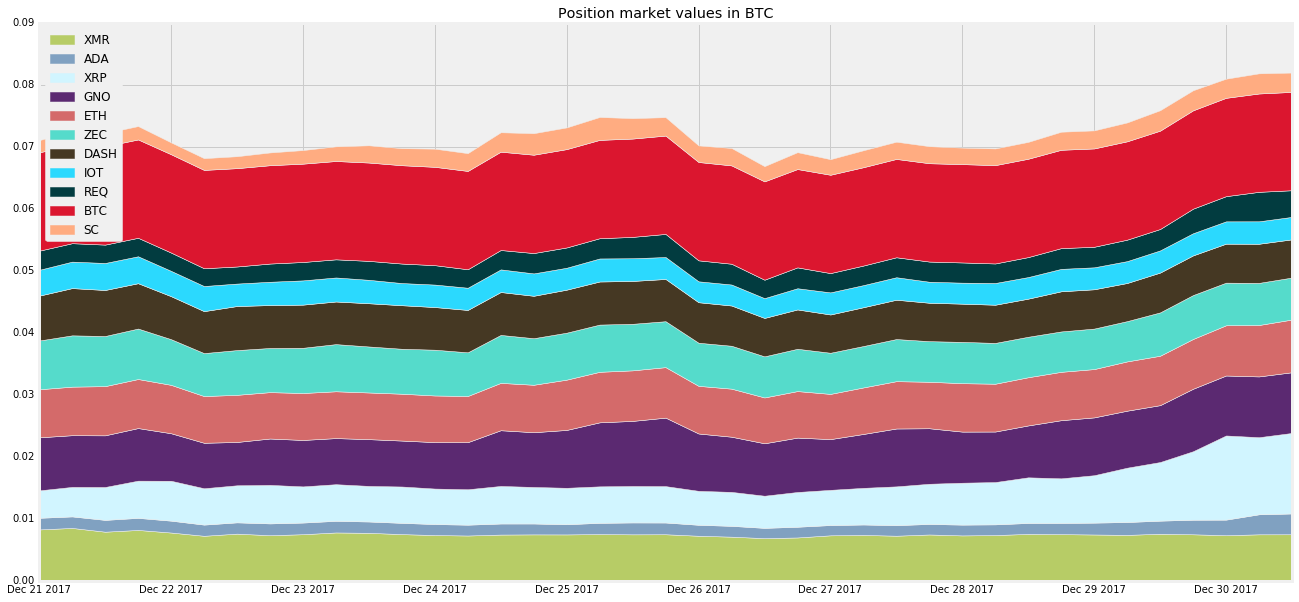

In [447]:
plt.figure(figsize=(20,10))
plt.stackplot(timestamps,
              [coinPrices for coinName, coinPrices in pricesInBtc.items()],
              colors = [v for k,v in colours.items()])

plt.legend([mpatches.Patch(color=v) for k,v in colours.items()], 
           colours.keys(),loc = 'upper left')
plt.title("Position market values in BTC")

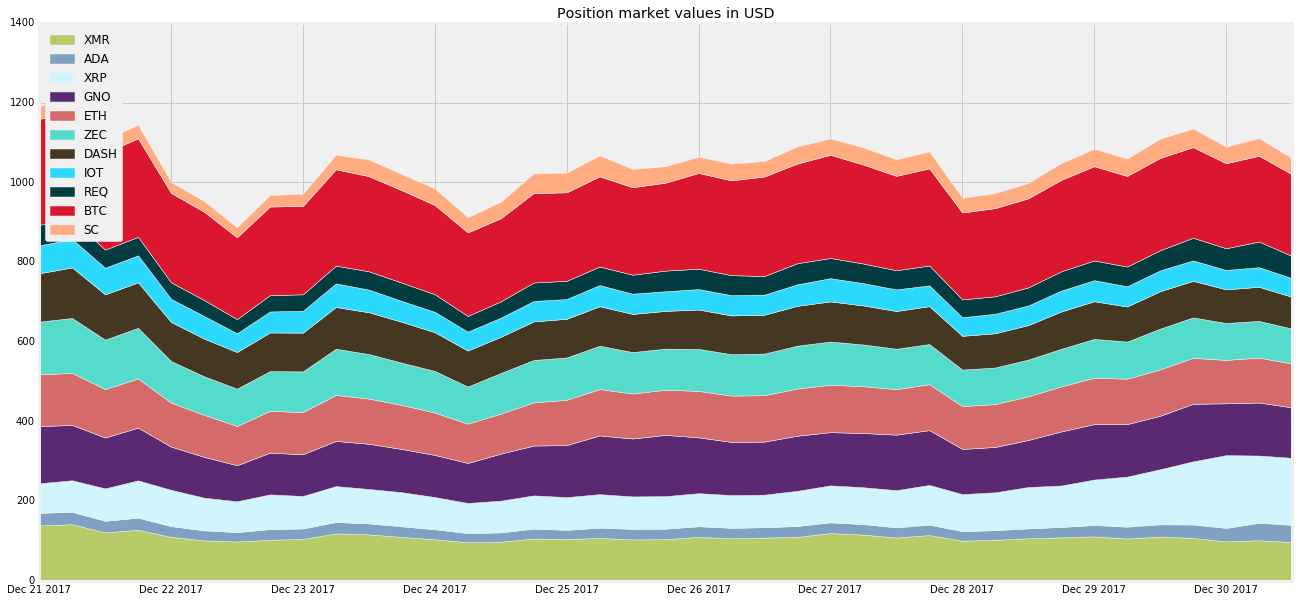

In [448]:
plt.figure(figsize=(20,10))
plt.stackplot(timestamps,
              [coinPrices for coinName, coinPrices in pricesInUsd.items()],
              colors = [v for k,v in colours.items()])

plt.legend([mpatches.Patch(color=v) for k,v in colours.items()], 
           colours.keys(),
           loc = 'upper left')

plt.title("Position market values in USD")

(0, 100)

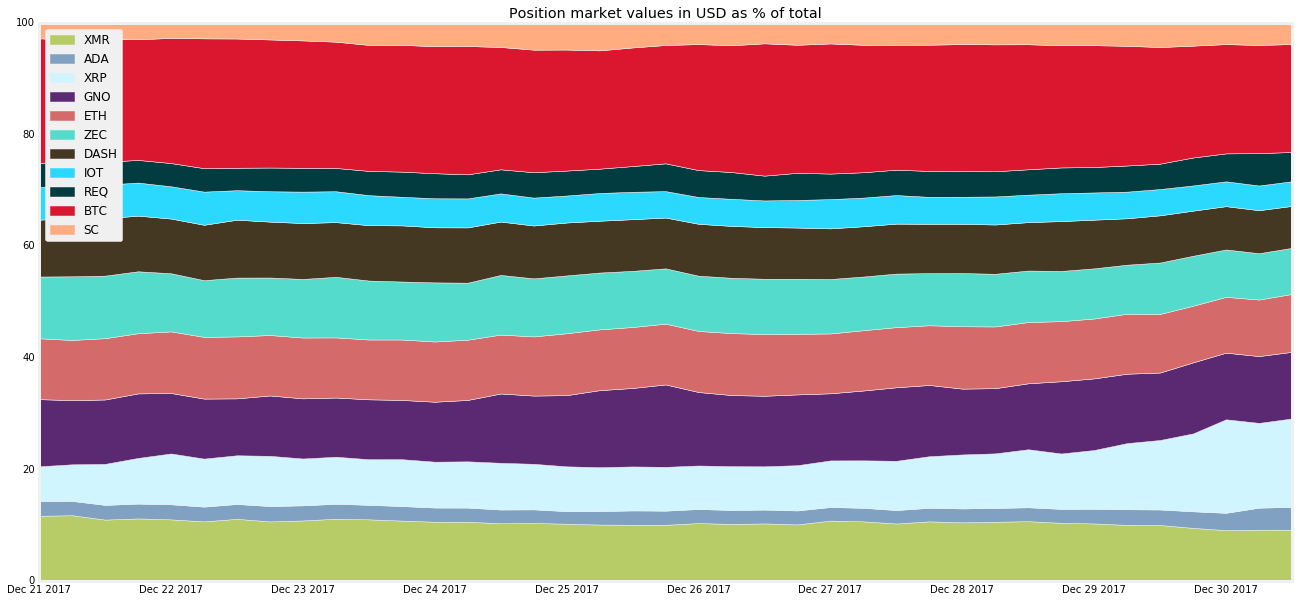

In [449]:
pricesInUsdStacked = {}

for coinName, coinPrices in pricesInUsd.items():
    pricesInUsdStacked[coinName] = []
    
    for i in range(len(coinPrices)):
        thisDayTotal = 0
        for coinKey in pricesInUsd.keys():
            thisDayTotal += pricesInUsd[coinKey][i]
            
        pricesInUsdStacked[coinName].append(pricesInUsd[coinName][i] / thisDayTotal * 100)
    
plt.figure(figsize=(20,10))
plt.stackplot(timestamps,
              [coinPrices for coinName, coinPrices in pricesInUsdStacked.items()],
              colors = [v for k,v in colours.items()])
plt.ylim(0, 100)
plt.legend([mpatches.Patch(color=v) for k,v in colours.items()], 
           colours.keys(),
           loc = 'upper left')

plt.title("Position market values in USD as % of total")

(0, 100)

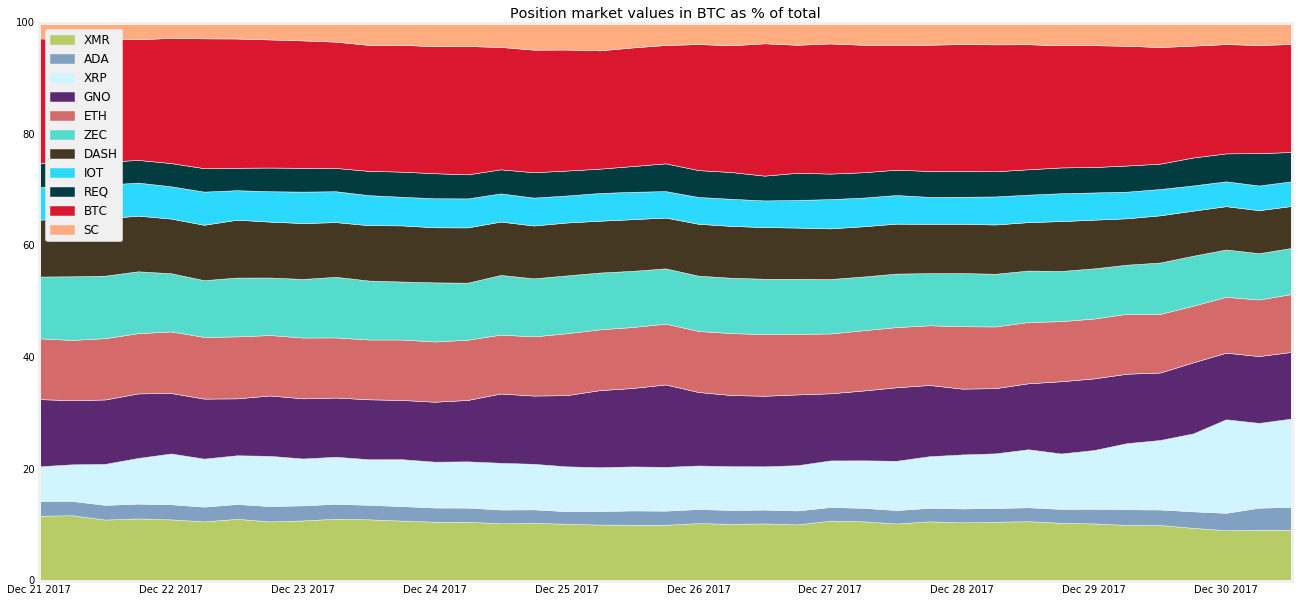

In [450]:
pricesInBtcStacked = {}

for coinName, coinPrices in pricesInBtc.items():
    pricesInBtcStacked[coinName] = []
    
    for i in range(len(coinPrices)):
        thisDayTotal = 0
        for coinKey in pricesInBtc.keys():
            thisDayTotal += pricesInBtc[coinKey][i]
            
        pricesInBtcStacked[coinName].append(pricesInBtc[coinName][i] / thisDayTotal * 100)
    
plt.figure(figsize=(20,10))
plt.stackplot(timestamps,
              [coinPrices for coinName, coinPrices in pricesInBtcStacked.items()],
              colors = [v for k,v in colours.items()])
plt.ylim(0, 100)
plt.legend([mpatches.Patch(color=v) for k,v in colours.items()], 
           colours.keys(),
           loc = 'upper left')

plt.title("Position market values in BTC as % of total")